<a href="https://www.kaggle.com/code/khangjrakpamarjun/variations-of-same-image-using-hugging-face?scriptVersionId=138457144" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-package/amazon_damaged.jpg
/kaggle/input/broken-mobile-screen/mobile_broken (1).png
/kaggle/input/broken-amazon-package/2023_July_KHANGJRAKPAM_ARJUN.pdf
/kaggle/input/broken-amazon-package/broken_amazon_packaging.jpeg
/kaggle/input/broken-amazon-package/damaged-cardboard-box-with-hole_51524-16118.jpeg
/kaggle/input/broken-amazon-package/kaggle-llm-science-exam/sample_submission.csv
/kaggle/input/broken-amazon-package/kaggle-llm-science-exam/train.csv
/kaggle/input/broken-amazon-package/kaggle-llm-science-exam/test.csv


In [2]:
!pip install diffusers
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 25.5 MB/s eta 0:00:00


# Image Variation

In [3]:
from diffusers import StableDiffusionImageVariationPipeline
from PIL import Image
import random

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [4]:
pipe = StableDiffusionImageVariationPipeline.from_pretrained(
    "lambdalabs/sd-image-variations-diffusers", revision="v2.0"
)
pipe = pipe.to("cuda")

image_encoder/model.safetensors not found


Fetching 11 files:   0%|          | 0/11 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


In [5]:
from diffusers.utils import load_image
# url = "/kaggle/input/broken-mobile-screen/mobile_broken (1).png"
# url ="/kaggle/input/broken-amazon-package/broken_amazon_packaging.jpeg"
url = "/kaggle/input/amazon-package/amazon_damaged.jpg"
original_image = load_image(url)

# Original Image

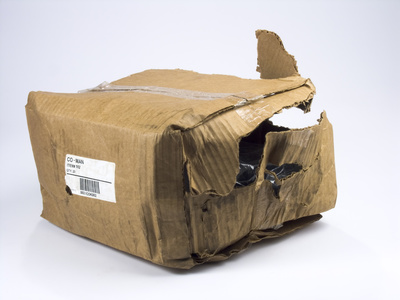

In [6]:
original_image

### Putting the num_images_per_prompt = 1 and regenerating the images iteratively gave images which were similar to the orinal images

# Variations of image generated by hugging face's StableDiffusionImageVariationPipeline

  0%|          | 0/50 [00:00<?, ?it/s]

file is  169731_result.jpg


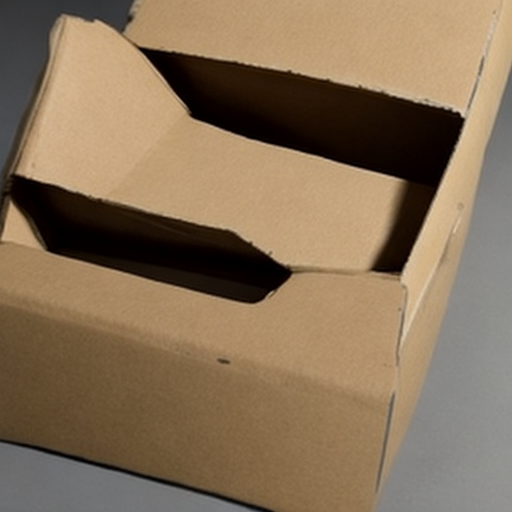

In [7]:
# Generates a random number between
# a given positive range
r1 = random.randint(1,1000000)
r1
out = pipe(original_image, num_images_per_prompt=1,guidance_scale=5)
file = str(r1)+"_result.jpg"
print("file is ", file)
out["images"][0].save(file)
out["images"][0]